Uncomment to install the missing packages if you are missing the packages needed

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install seaborn
# !pip install pip install catboost

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,MANUFACTURING YEAR,BRAND,MODEL,MODEL VERSION,VEHICLE TYPE,GEAR,VEHICLE ID,REGISTRATION STATE,CONDITION,MILEAGE,EXTERIOR COLOUR,INTERIOR COLOUR,SELLER,MARKET VALUE,SELLING PRICE,SALE DATE
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Univariate Models

## Linear Regression

#### MILEAGE

In [4]:
# Assuming your data is in a pandas DataFrame called 'df'
features = ['MILEAGE'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

Train Set : (377860, 1) (377860,)
Test Set  : (94465, 1) (94465,)


LinearRegression()

In [5]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 60380220.39908442
Root Mean Squared Error: 7770.471053873402
R-squared: 0.3356777870212565
Mean Absolute Error: 5399.032012605542


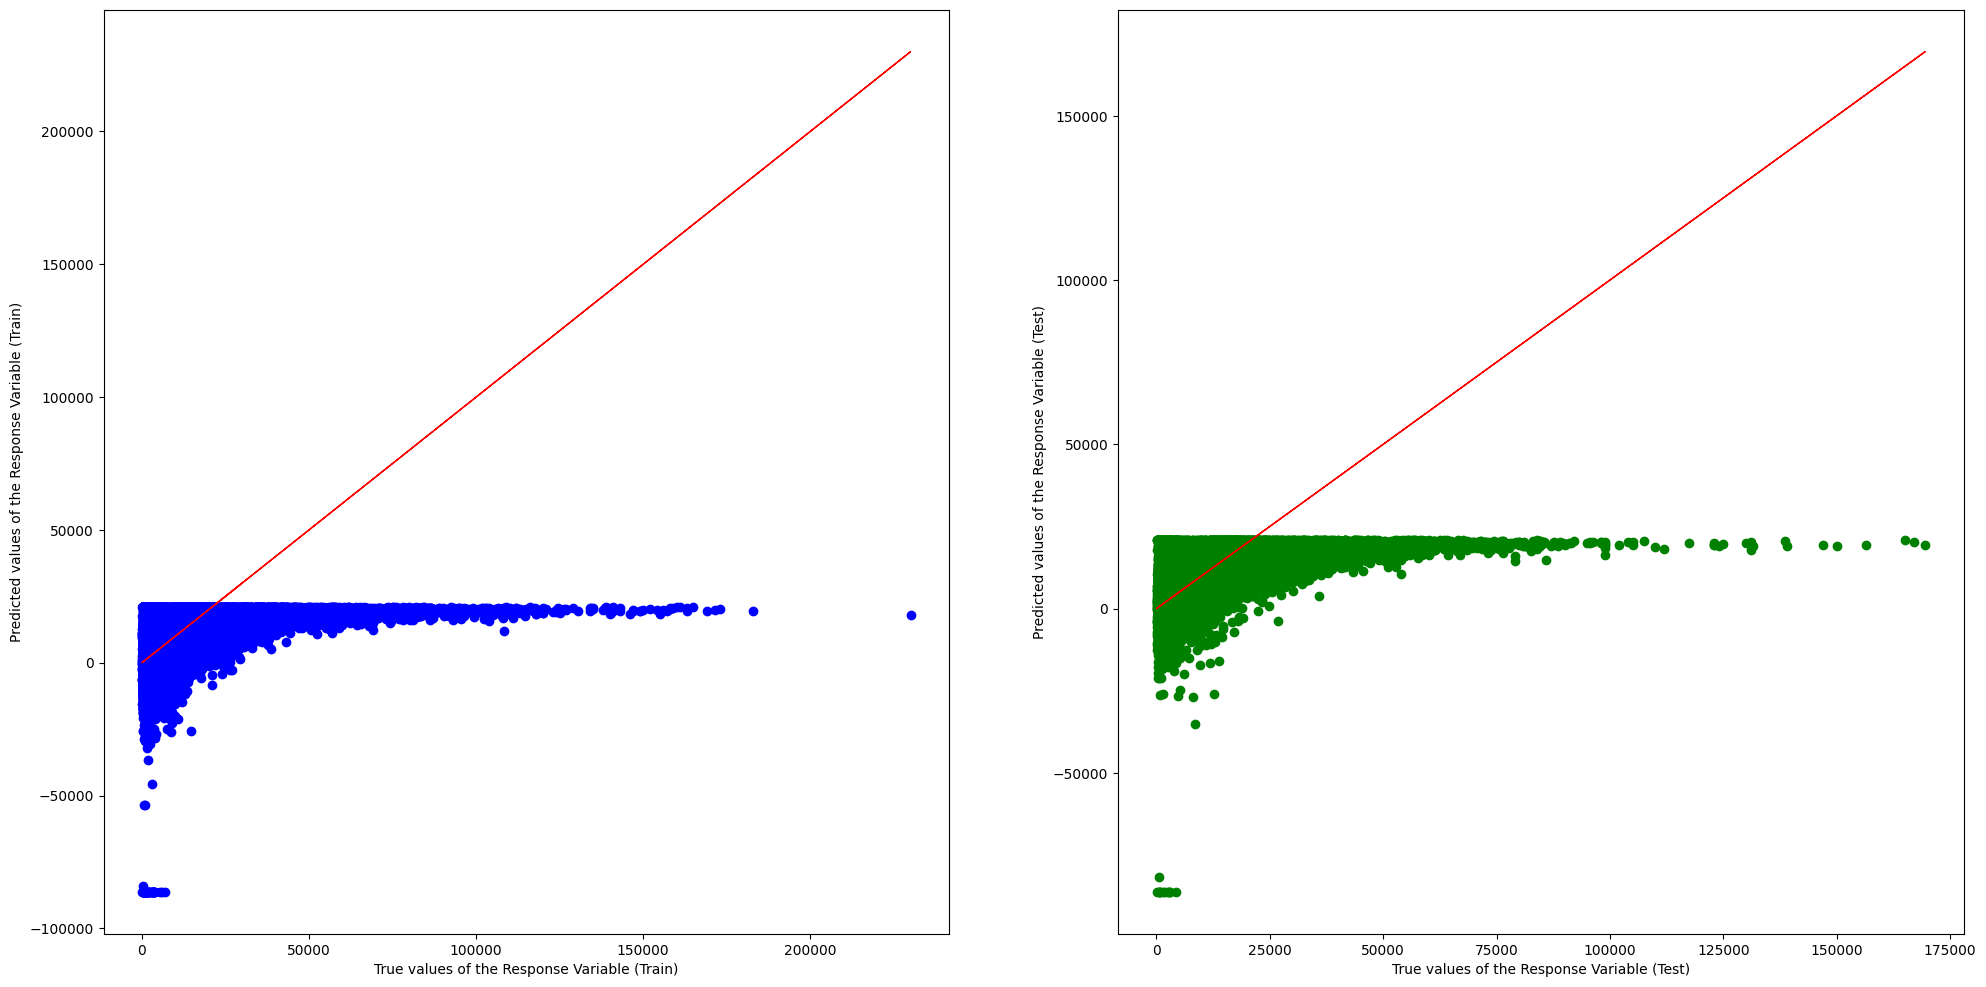

In [6]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### MANUFACTURING YEAR

In [7]:
# Assuming your data is in a pandas DataFrame called 'df'
features = ['MANUFACTURING YEAR'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

Train Set : (377860, 1) (377860,)
Test Set  : (94465, 1) (94465,)


LinearRegression()

In [8]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 60163456.589314744
Root Mean Squared Error: 7756.510593644203
R-squared: 0.33806269076702156
Mean Absolute Error: 5454.841053982728


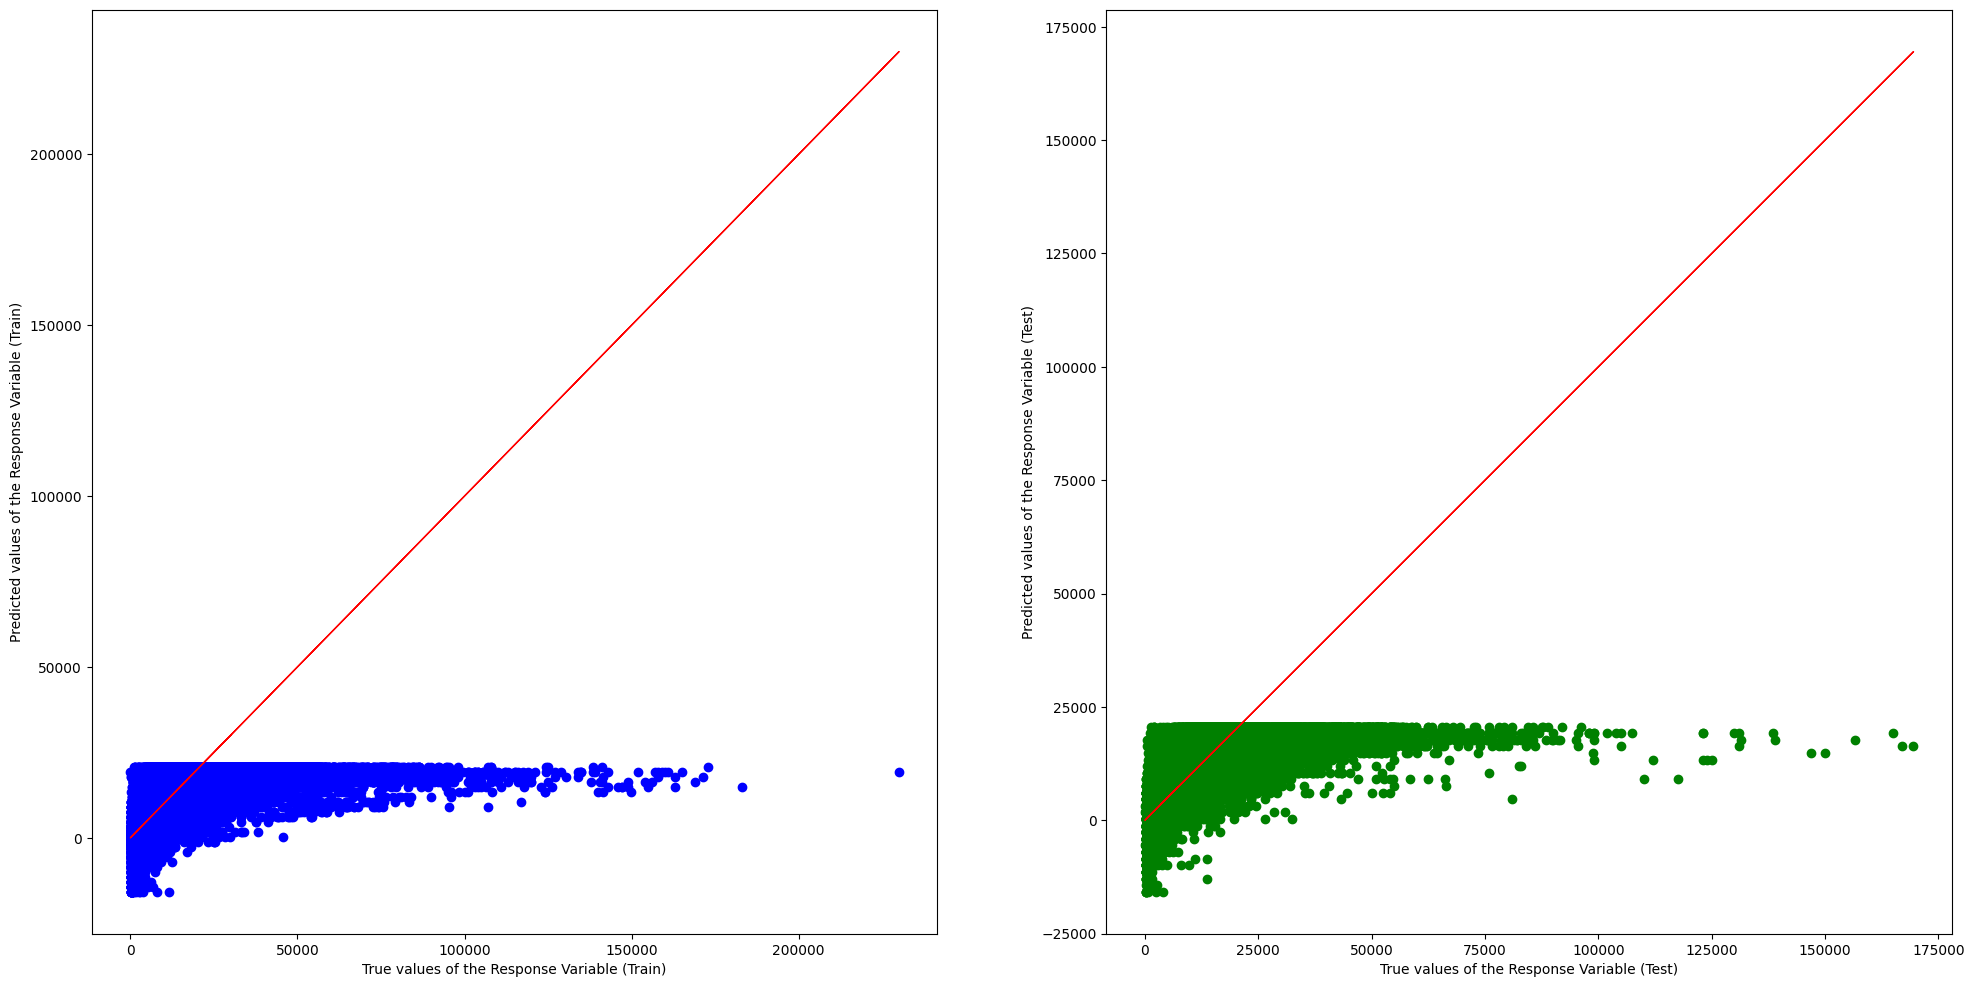

In [9]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Condition

In [10]:
# Assuming your data is in a pandas DataFrame called 'df'
features = ['CONDITION'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

Train Set : (377860, 1) (377860,)
Test Set  : (94465, 1) (94465,)


LinearRegression()

In [11]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 81964821.82954346
Root Mean Squared Error: 9053.442540246415
R-squared: 0.09819719993873344
Mean Absolute Error: 6612.613166542027


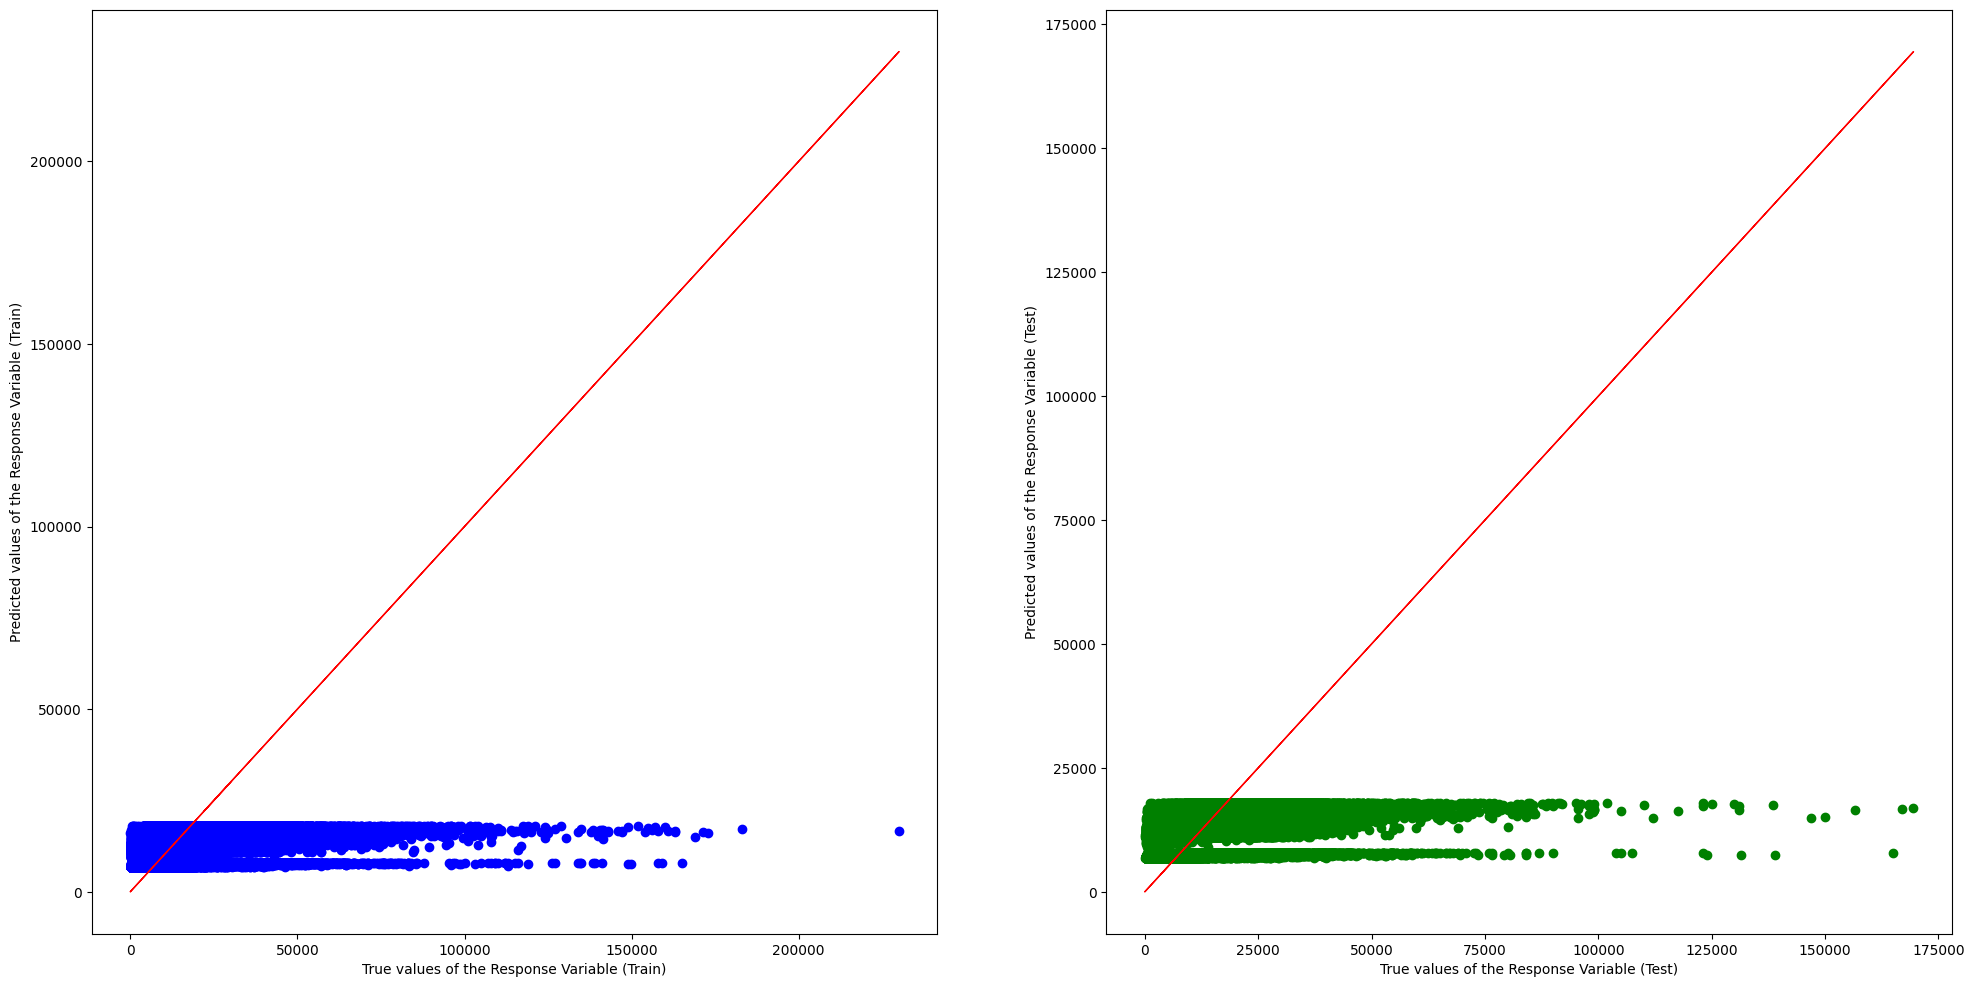

In [12]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### MARKET VALUE

In [13]:
# Assuming your data is in a pandas DataFrame called 'df'
features = ['MARKET VALUE'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

Train Set : (377860, 1) (377860,)
Test Set  : (94465, 1) (94465,)


LinearRegression()

In [14]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2853566.9765613847
Root Mean Squared Error: 1689.2504185470502
R-squared: 0.9686041568543021
Mean Absolute Error: 1076.9585073979874


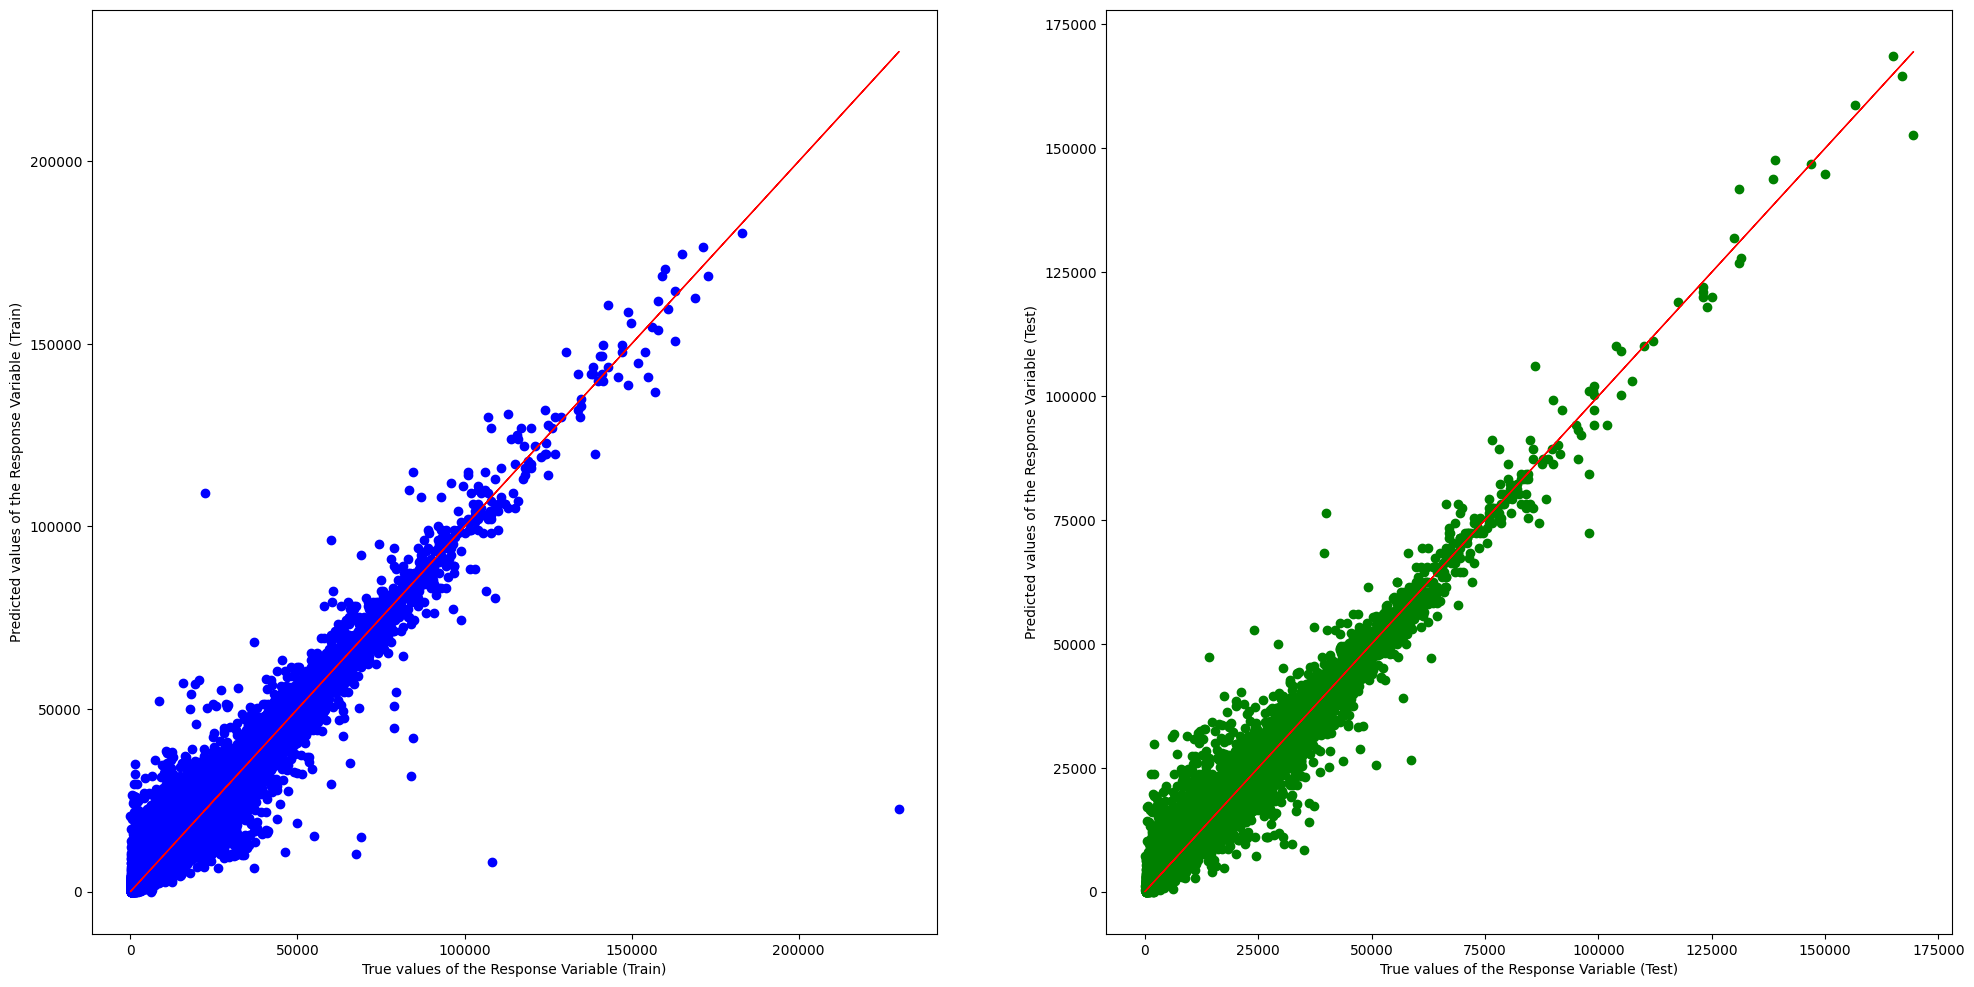

In [15]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Multivariate Models


## Linear Regression

### Numeric Only

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION'

In [16]:
# Assuming your data is in a pandas DataFrame called 'df'
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

Train Set : (377860, 3) (377860,)
Test Set  : (94465, 3) (94465,)


LinearRegression()

In [17]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 55246141.70903037
Root Mean Squared Error: 7432.774832391357
R-squared: 0.3921645387164431
Mean Absolute Error: 5152.060545864938


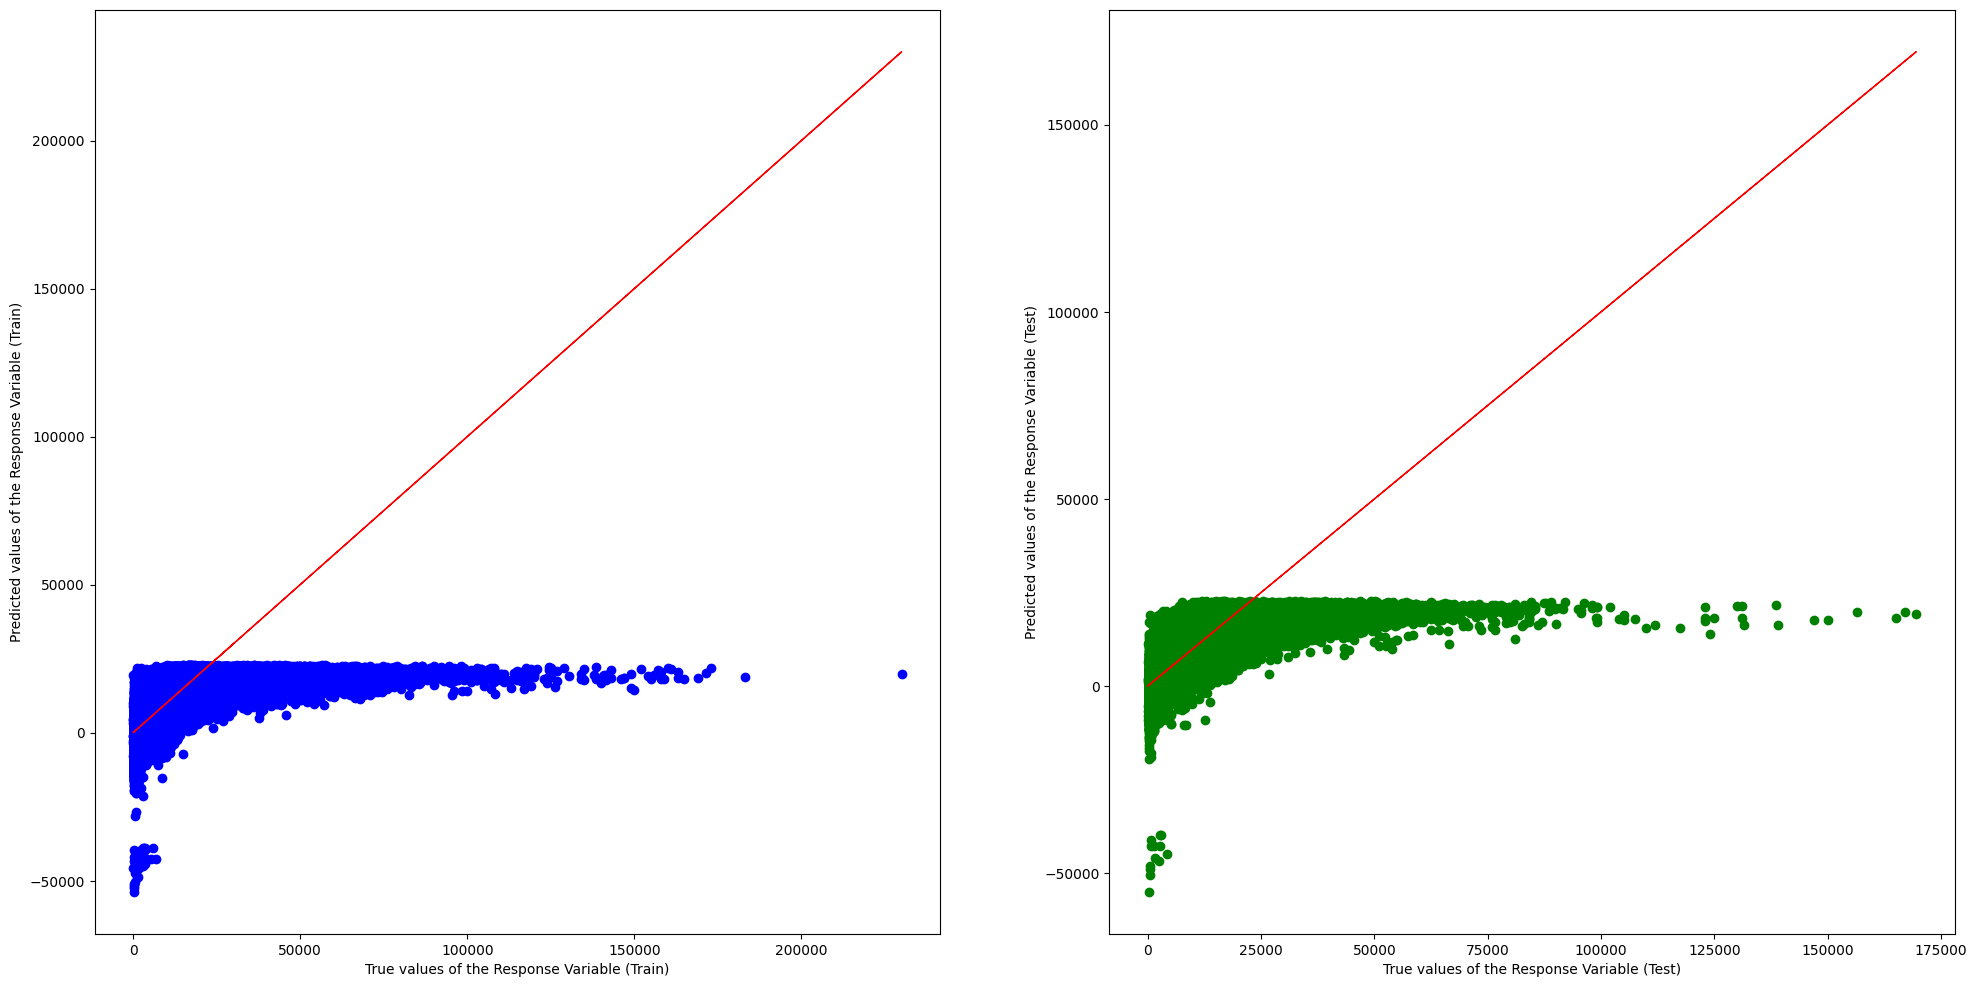

In [18]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'MARKET VALUE'

In [19]:
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'MARKET VALUE'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2633779.7713868343
Root Mean Squared Error: 1622.8924090606974
R-squared: 0.9710223249491007
Mean Absolute Error: 1040.4784050711849


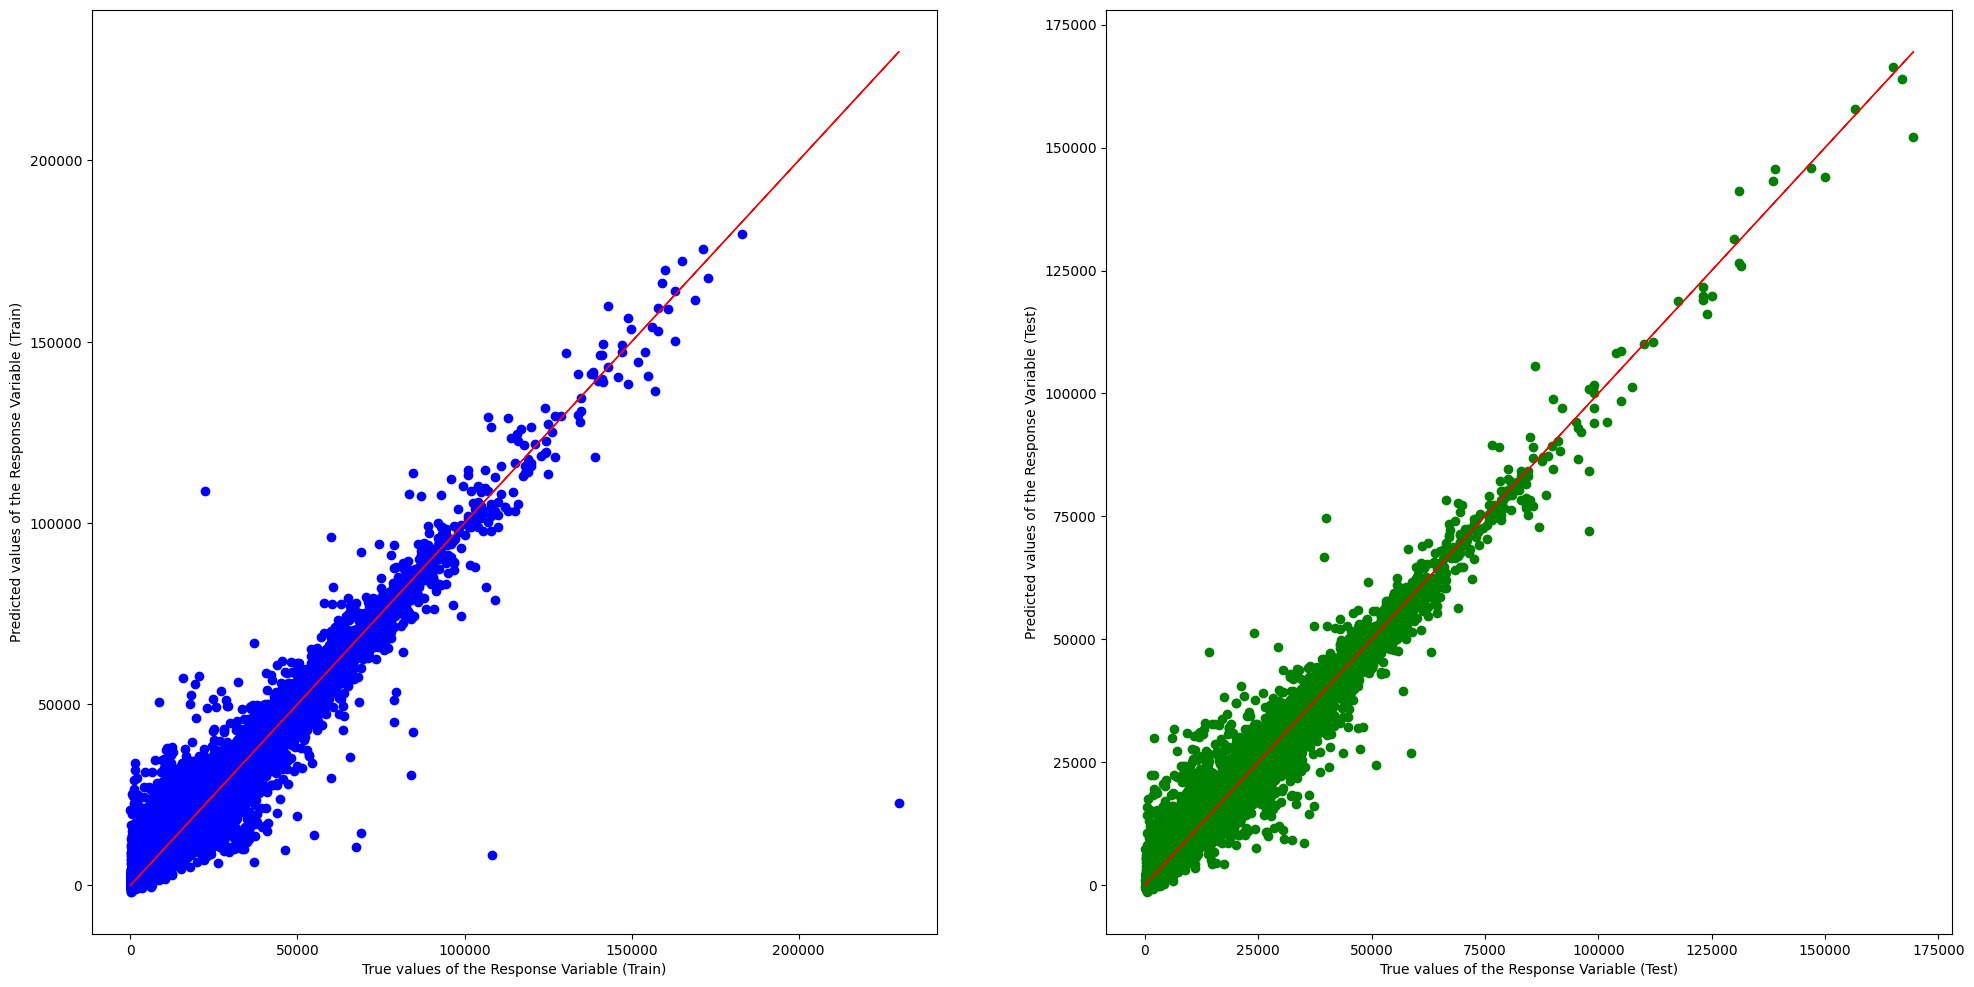

In [21]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### With Categorical (One Hot Encoded)

In [22]:
# Initialisation for One Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas') 

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'BRAND', 'MODEL'

In [23]:
encoded_data = encoder.fit_transform(df[['BRAND', 'MODEL']]) 

In [24]:
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION']
target = 'SELLING PRICE'

X = pd.concat([df[features], encoded_data], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 16499001.61133006
Root Mean Squared Error: 4061.896307308947
R-squared: 0.8184727847971743
Mean Absolute Error: 2635.238055468495


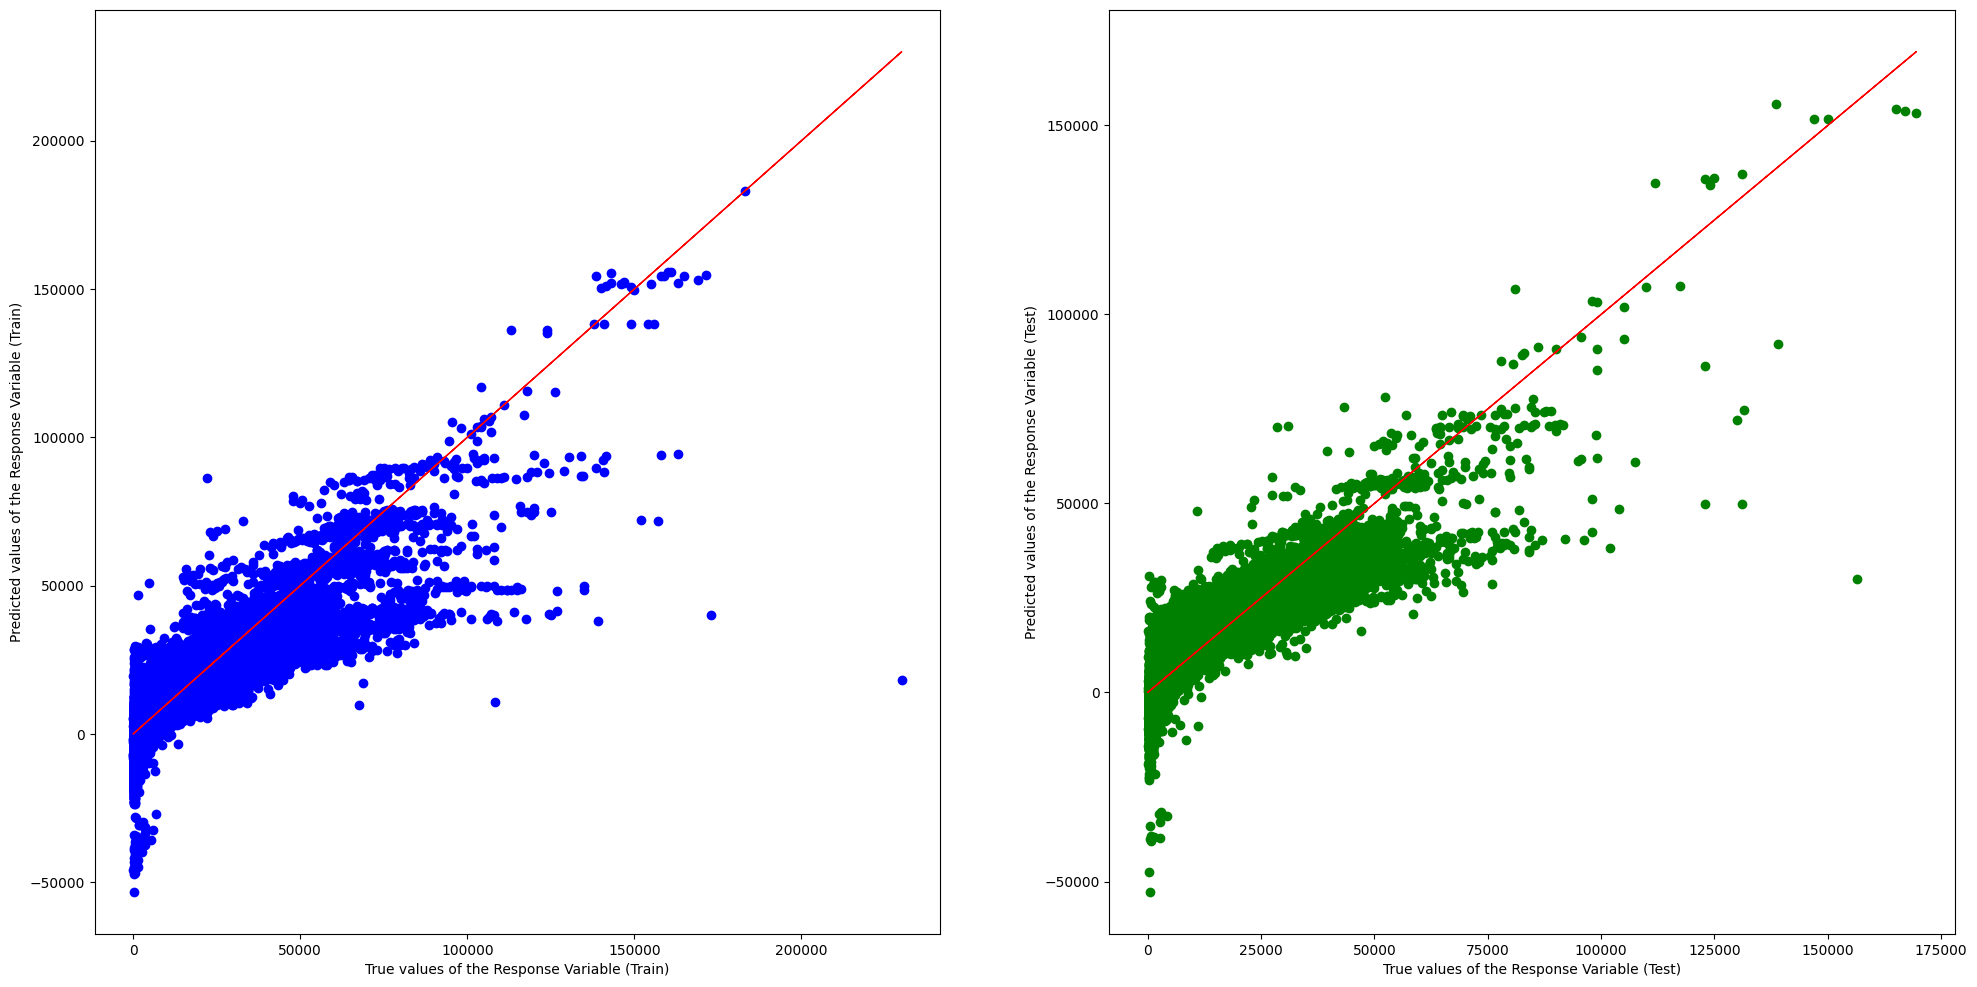

In [26]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## With Categorical (Label Encoded)

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'BRAND', 'MODEL'

In [27]:
encoder = LabelEncoder()
df['BRAND_encoded'] = encoder.fit_transform(df['BRAND']) 
df['MODEL_encoded'] = encoder.fit_transform(df['MODEL']) 
df['VEHICLE TYPE_encoded'] = encoder.fit_transform(df['VEHICLE TYPE']) 
df['MODEL VERSION_encoded'] = encoder.fit_transform(df['MODEL VERSION']) 

In [28]:
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'BRAND_encoded', 'MODEL_encoded']
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 54667575.21941455
Root Mean Squared Error: 7393.752445099481
R-squared: 0.39853010956392465
Mean Absolute Error: 5106.210467002335


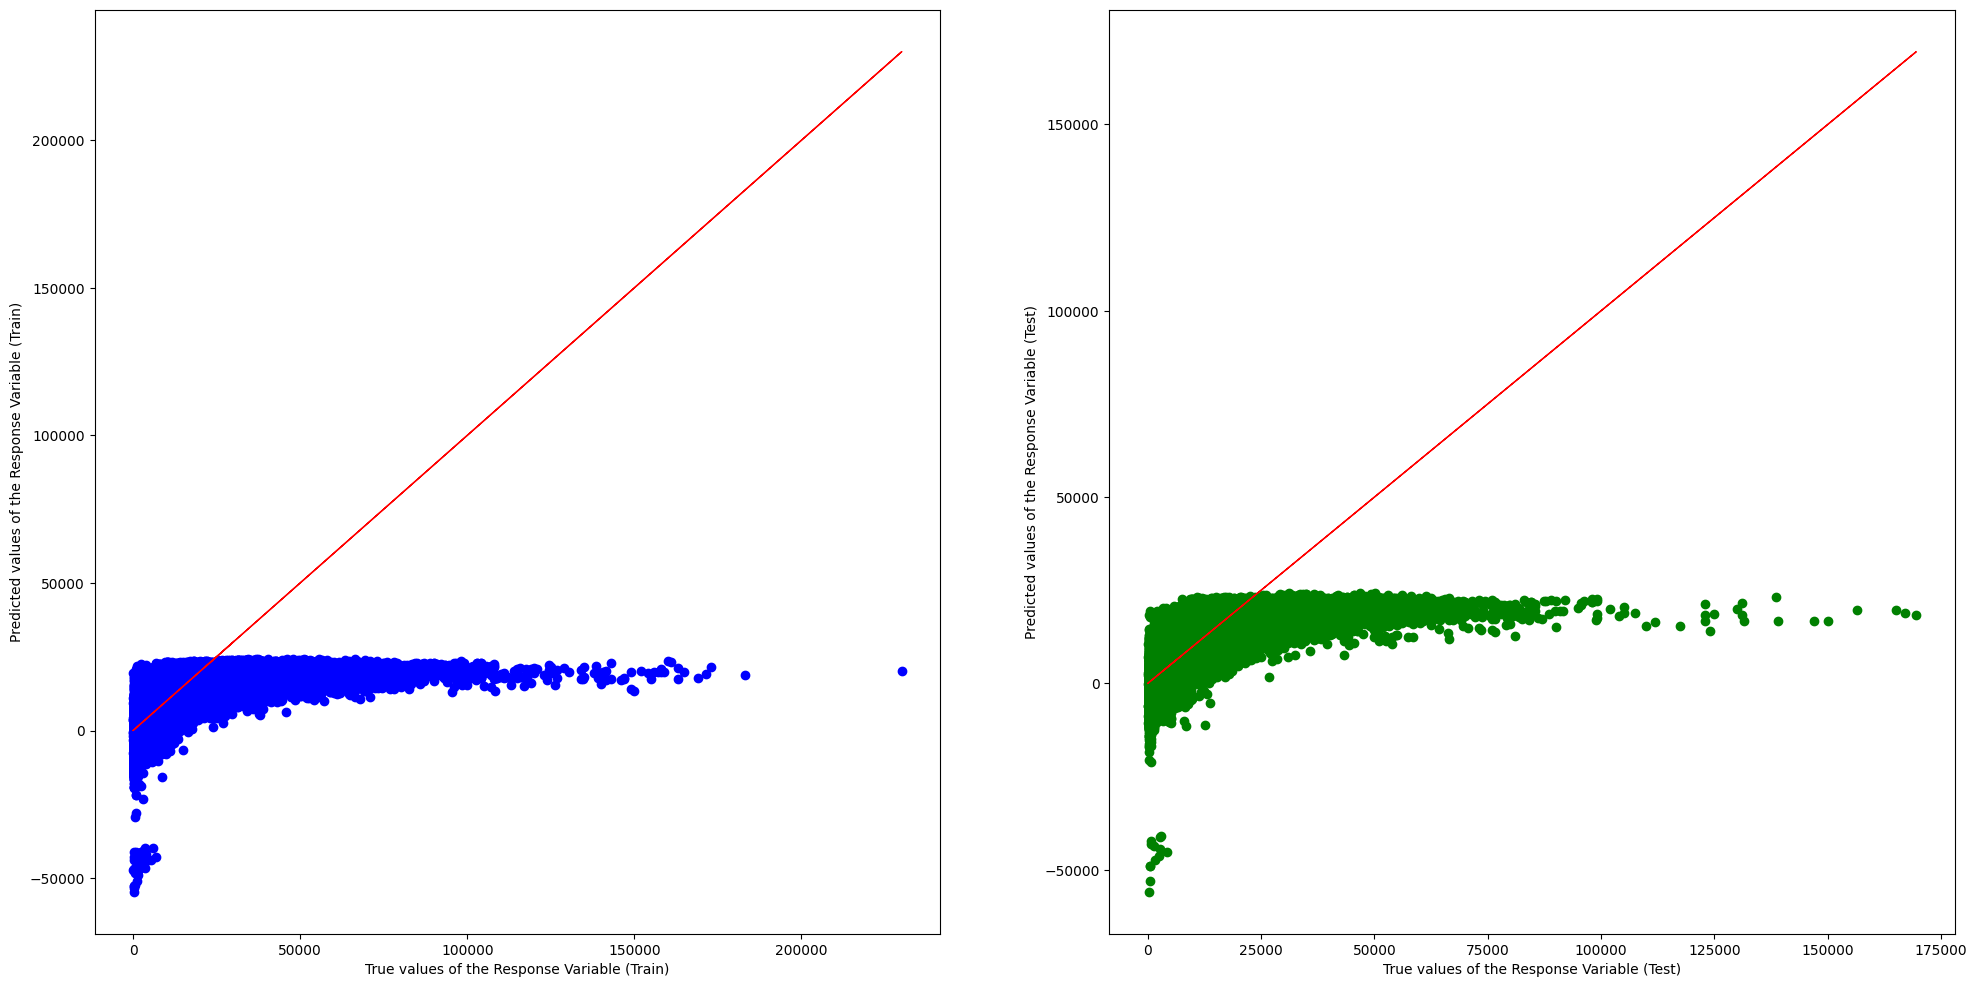

In [30]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Regression Tree

## Numeric Only

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION'

In [31]:
# Assuming your data is in a pandas DataFrame called 'df'
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 99346481.68731385
Root Mean Squared Error: 9967.270523433877
R-squared: -0.09304129945125728
Mean Absolute Error: 6449.242994689478


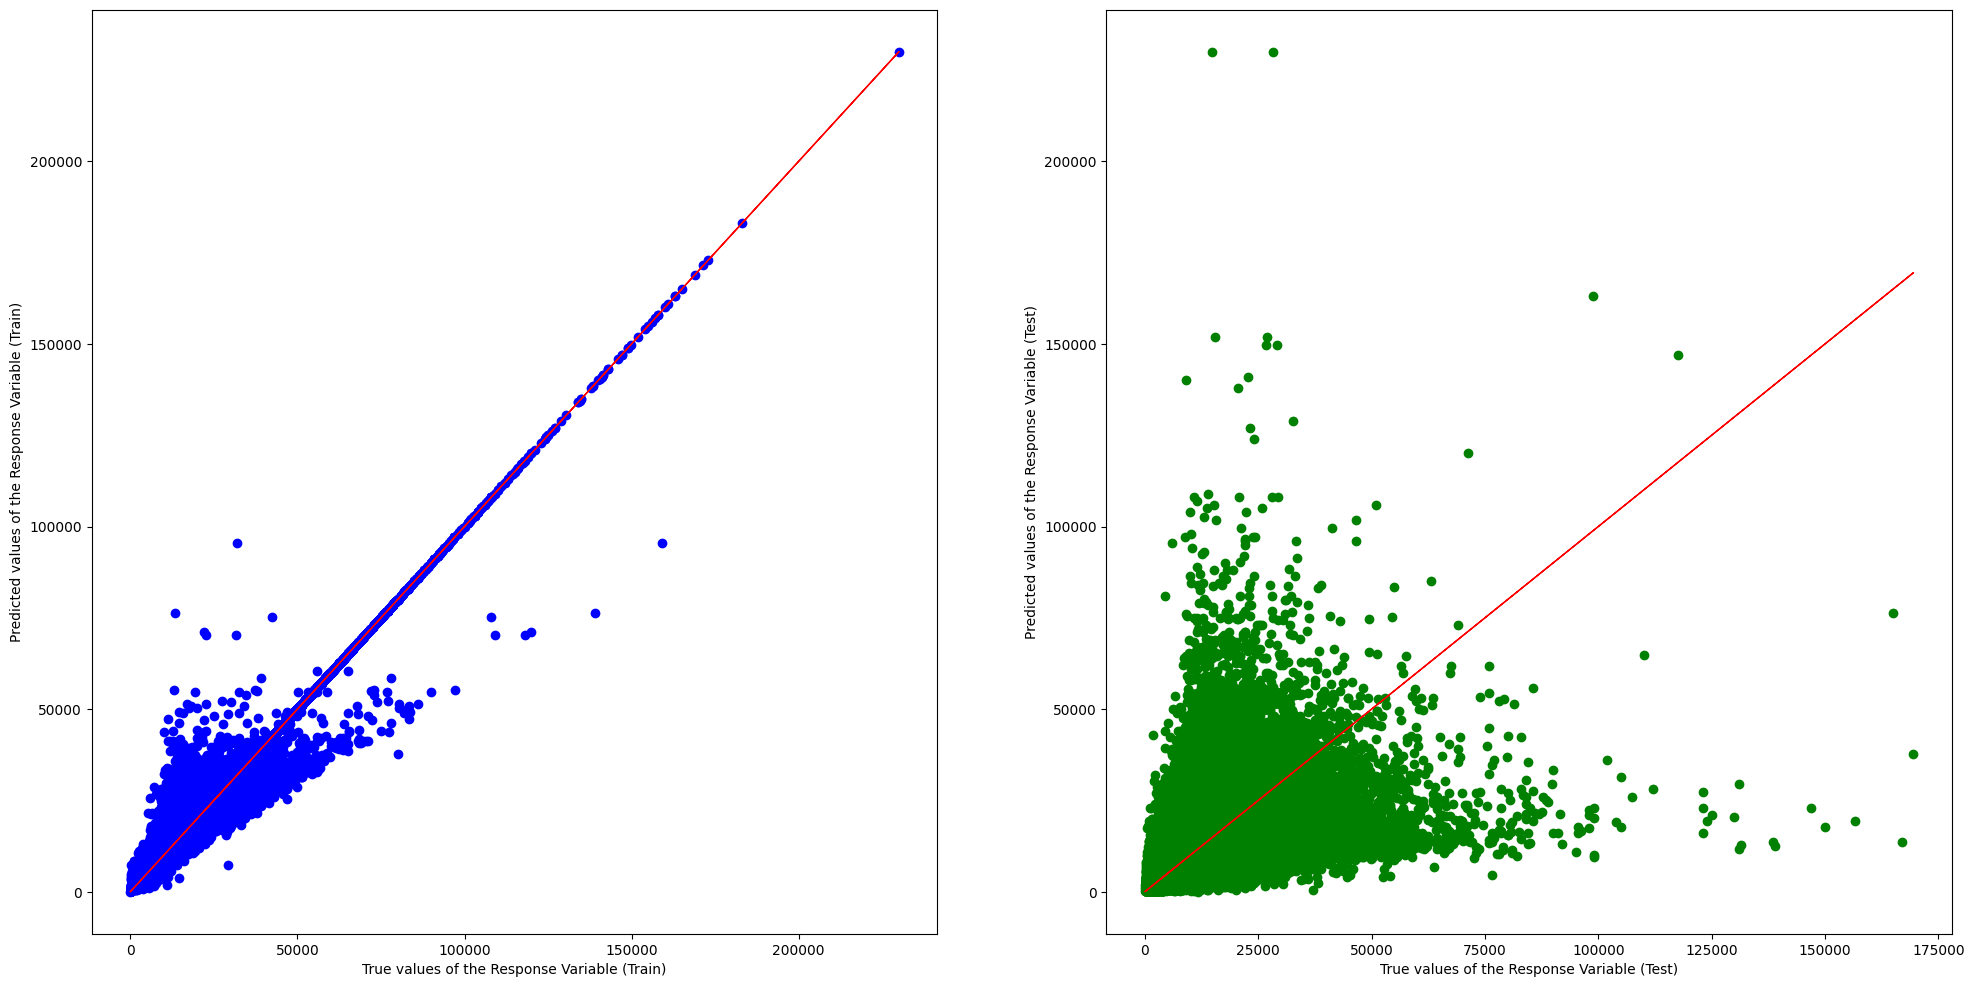

In [33]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'MARKET VALUE'

In [34]:
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'MARKET VALUE'] 
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4472899.757952975
Root Mean Squared Error: 2114.9231092295
R-squared: 0.9507877472789009
Mean Absolute Error: 1370.885490216835


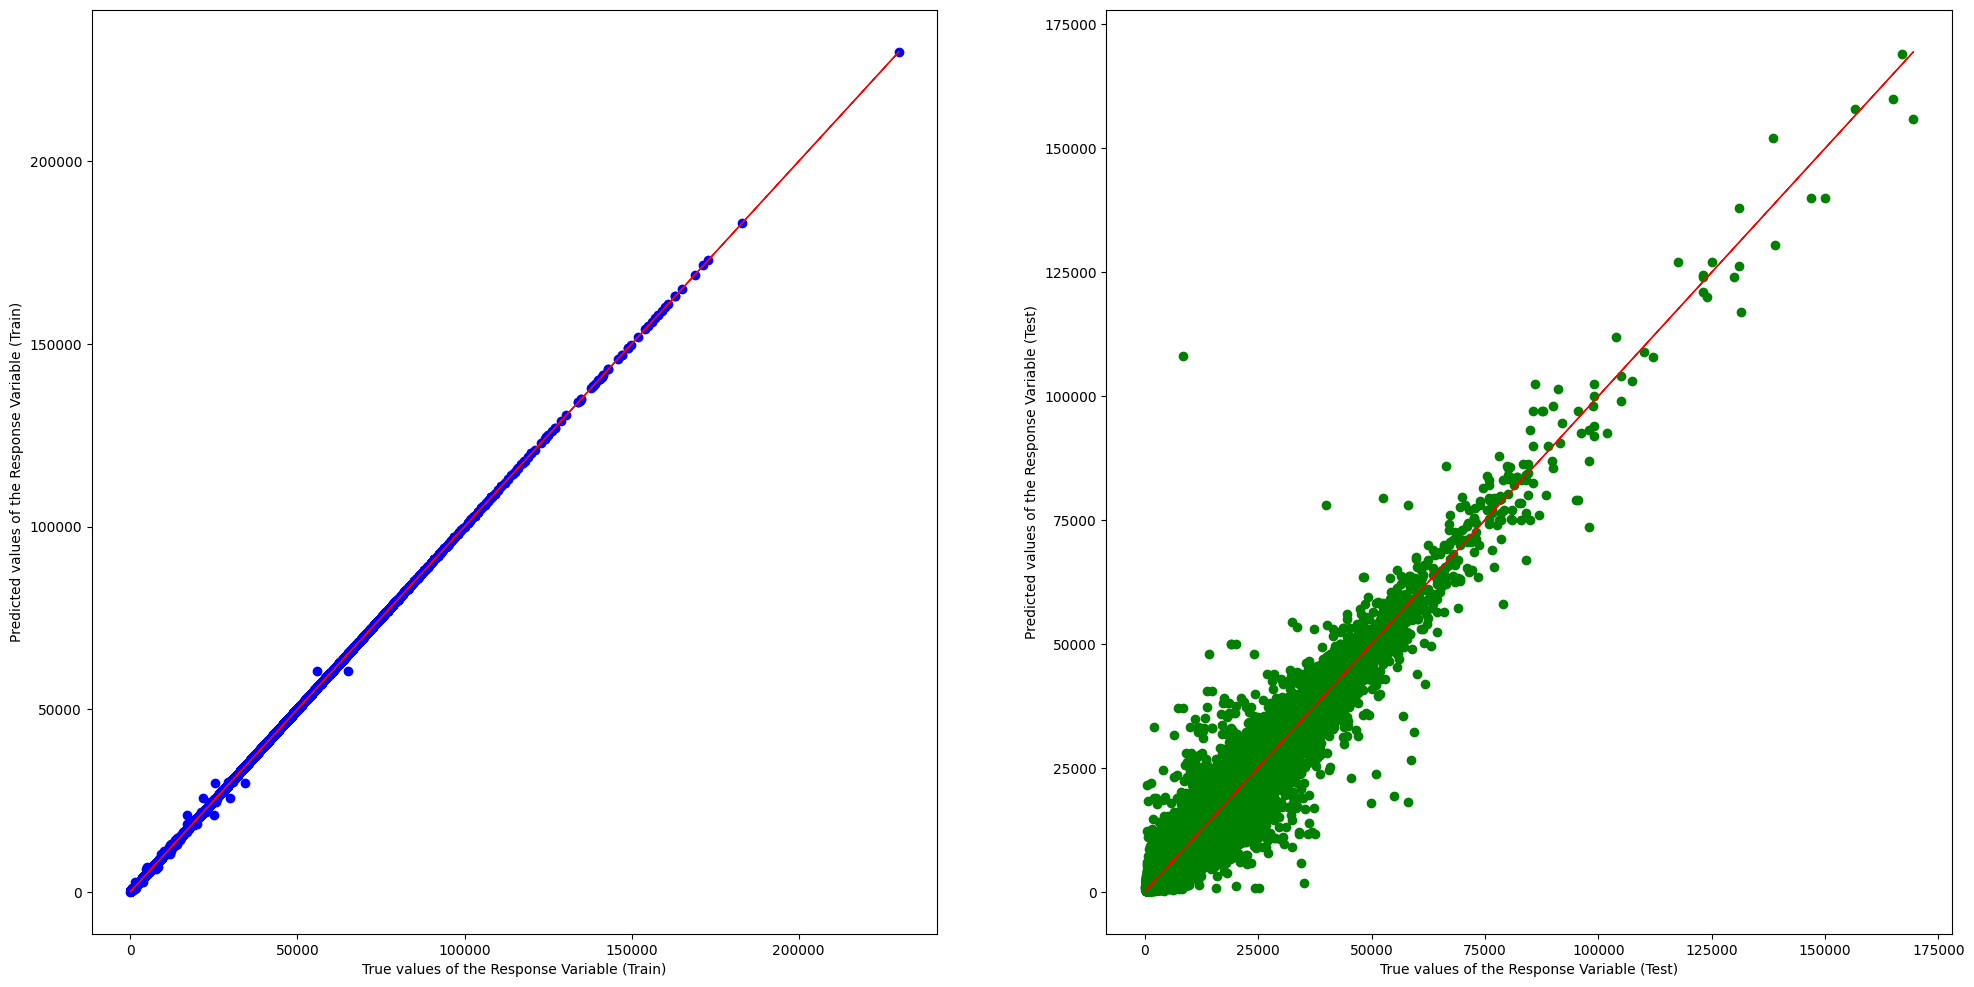

In [36]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## With Categorical (One Hot Encoded)

In [37]:
# Initialisation for One Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas') 

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'BRAND', 'MODEL'

In [38]:
encoded_data = encoder.fit_transform(df[['BRAND', 'MODEL']]) 

In [39]:
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION']
target = 'SELLING PRICE'

X = pd.concat([df[features], encoded_data], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 12064280.825093655
Root Mean Squared Error: 3473.367361091201
R-squared: 0.8672649804397738
Mean Absolute Error: 2122.8813899327797


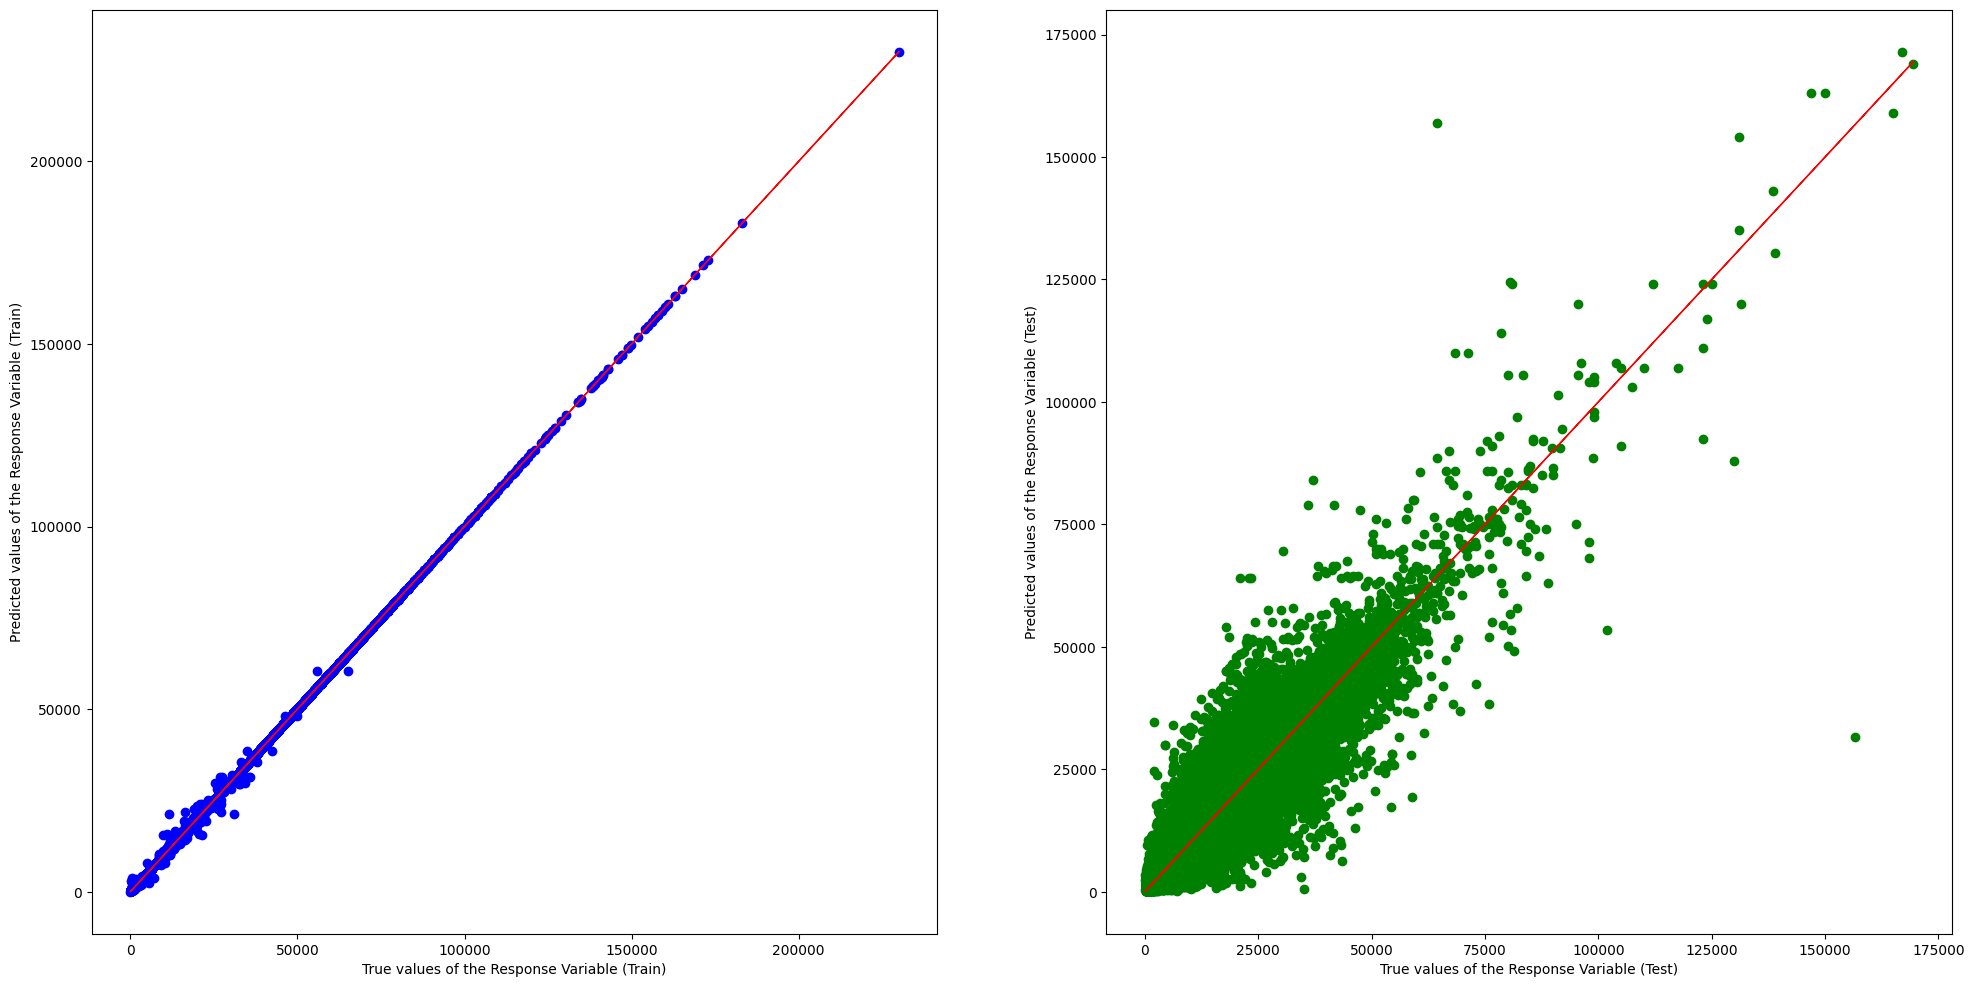

In [41]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## With Categorical (Label Encoded)

#### 'MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'BRAND', 'MODEL'

In [42]:
encoder = LabelEncoder()
df['BRAND_encoded'] = encoder.fit_transform(df['BRAND']) 
df['MODEL_encoded'] = encoder.fit_transform(df['MODEL']) 
df['VEHICLE TYPE_encoded'] = encoder.fit_transform(df['VEHICLE TYPE']) 
df['MODEL VERSION_encoded'] = encoder.fit_transform(df['MODEL VERSION']) 

In [43]:
features = ['MILEAGE', 'MANUFACTURING YEAR', 'CONDITION', 'BRAND_encoded', 'MODEL_encoded']
target = 'SELLING PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
y_test_pred = model.predict(X_test)  # Predicted prices
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 13419666.434004363
Root Mean Squared Error: 3663.286288840167
R-squared: 0.852352600835993
Mean Absolute Error: 2168.9817075107185


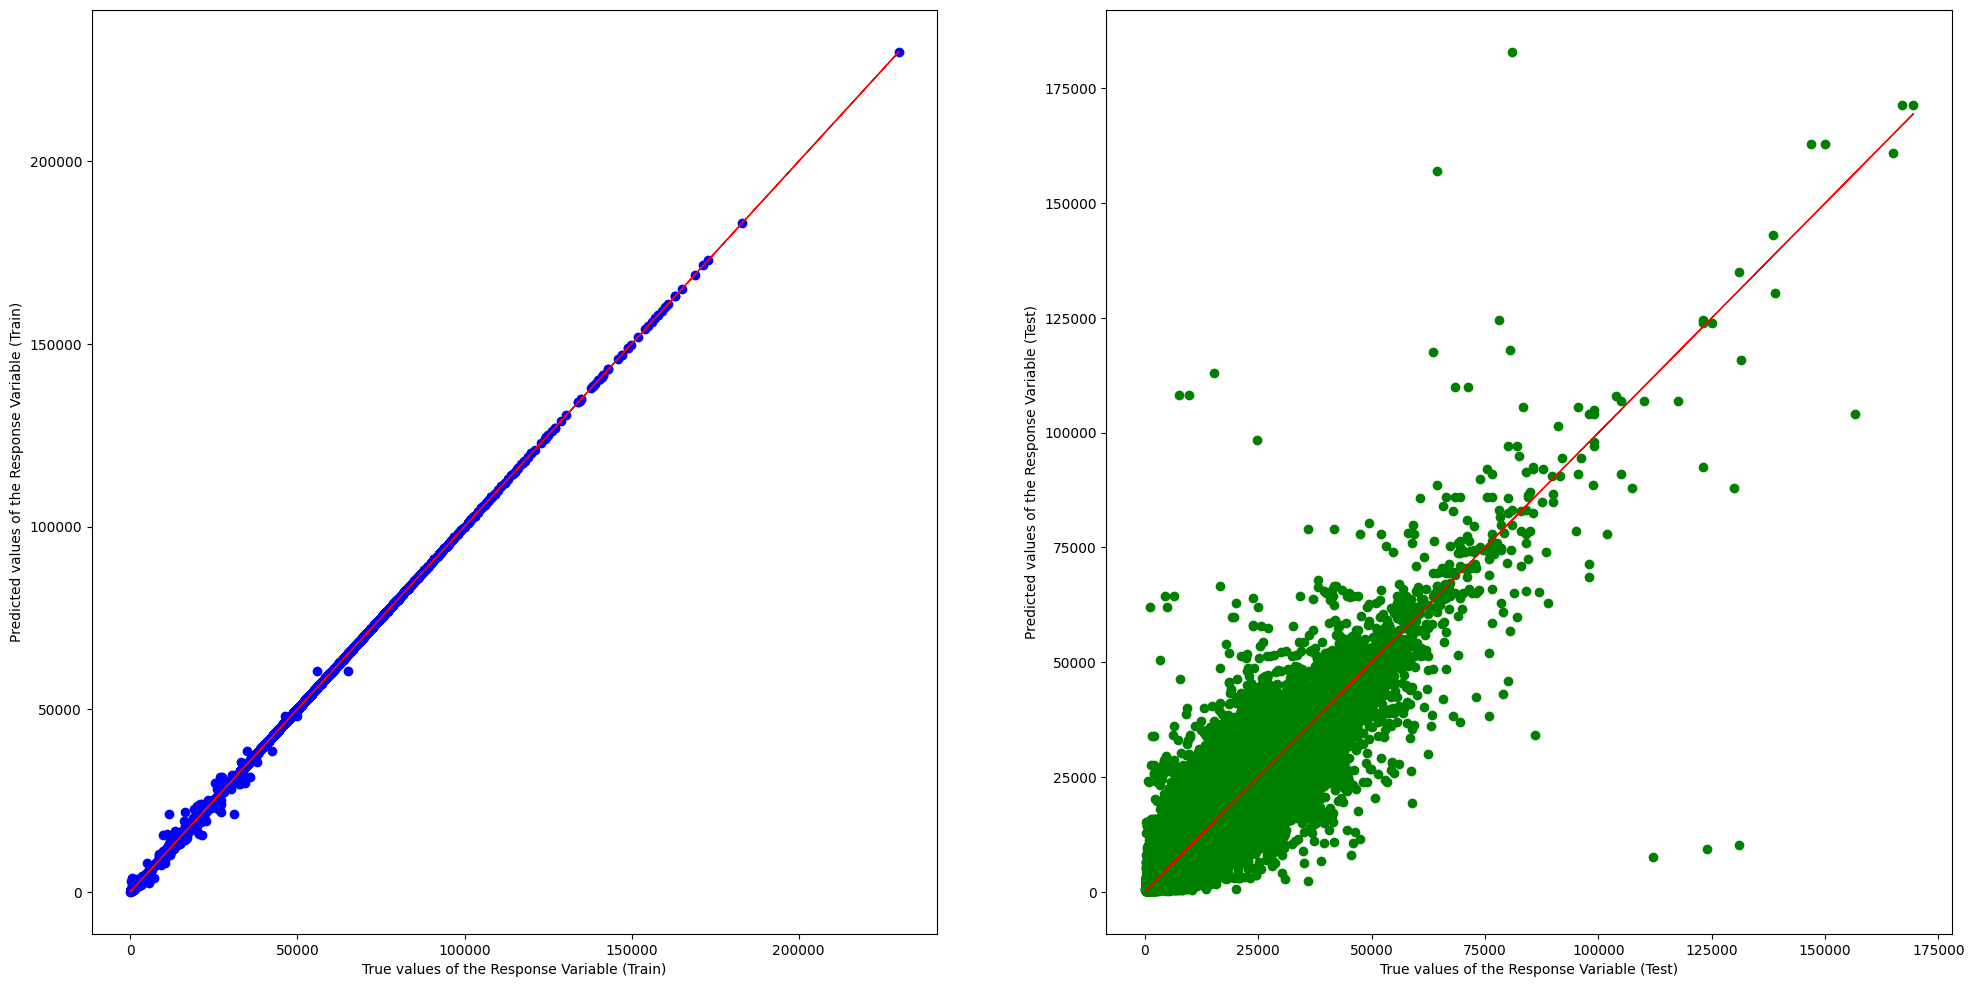

In [45]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Random Forest

In [46]:
y = df['SELLING PRICE']
X = df.drop(['SELLING PRICE', 'VEHICLE ID', 'SALE DATE', 'MARKET VALUE'], axis=1)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Process the Column (Standardize numberical features and One Hot Encoded Categorical features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Adjusted the RandomForestRegressor paramters for faster processing
RFR_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RFR_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MANUFACTURING YEAR',
                                                   'CONDITION', 'MILEAGE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['BRAND', 'MODEL',
                                                   'MODEL VERSION',
                                                   'VEHICLE TYPE', 'GEAR',
                                                   'REGISTRATION STATE',
                                                   'EXTERIOR COLOUR',
                                                   'INTERIOR COLOUR',
                                                   'SELLER'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, random_state=42))])

In [47]:
y_test_pred = RFR_model_pipeline.predict(X_test)  # Predicted prices
y_train_pred = RFR_model_pipeline.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 26992375.134546794
Root Mean Squared Error: 5195.418667879115
R-squared: 0.7030213824259832
Mean Absolute Error: 3359.2149261792947


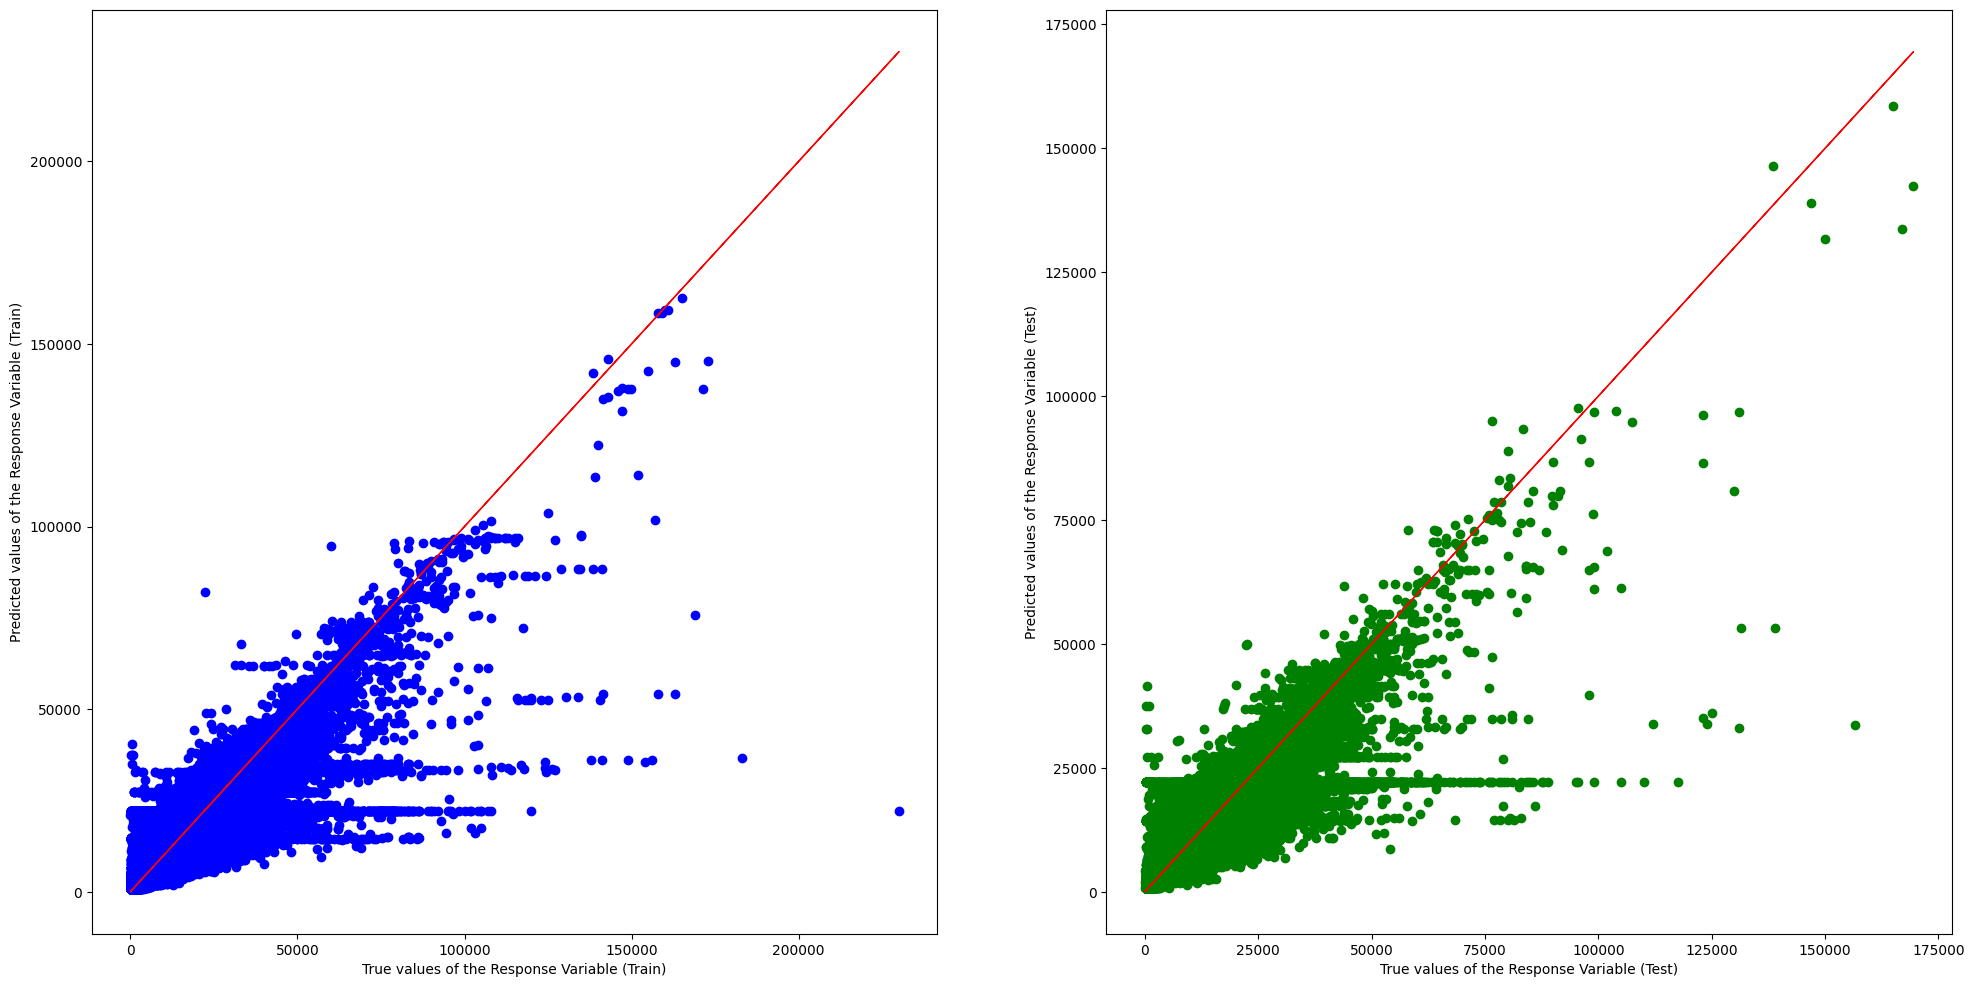

In [48]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## CatBoost

In [49]:
y = df['SELLING PRICE']
X = df.drop(['SELLING PRICE', 'VEHICLE ID', 'SALE DATE', 'MARKET VALUE'], axis=1)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost can handle categorical features

# use CPU to train
# cat_model = CatBoostRegressor(random_state=42, verbose=0, cat_features=categorical_features)

# use GPU to train
cat_model = CatBoostRegressor(random_state=42, verbose=1, cat_features=categorical_features, task_type="GPU",devices='0')

cat_model.fit(X_train, y_train)

Learning rate set to 0.087891
0:	learn: 9091.5867099	total: 252ms	remaining: 4m 11s
1:	learn: 8602.7188340	total: 417ms	remaining: 3m 27s
2:	learn: 8160.4844264	total: 582ms	remaining: 3m 13s
3:	learn: 7743.5443905	total: 740ms	remaining: 3m 4s
4:	learn: 7370.4350718	total: 910ms	remaining: 3m 1s
5:	learn: 7048.2321901	total: 1.09s	remaining: 3m
6:	learn: 6757.0219485	total: 1.28s	remaining: 3m 1s
7:	learn: 6485.4699491	total: 1.49s	remaining: 3m 4s
8:	learn: 6254.8611042	total: 1.7s	remaining: 3m 7s
9:	learn: 6055.5970958	total: 1.97s	remaining: 3m 14s
10:	learn: 5852.4306430	total: 2.18s	remaining: 3m 16s
11:	learn: 5682.6448749	total: 2.38s	remaining: 3m 15s
12:	learn: 5517.5342185	total: 2.54s	remaining: 3m 12s
13:	learn: 5374.7374442	total: 2.67s	remaining: 3m 7s
14:	learn: 5232.0464963	total: 2.82s	remaining: 3m 5s
15:	learn: 5125.8927525	total: 2.98s	remaining: 3m 3s
16:	learn: 5022.6124866	total: 3.11s	remaining: 2m 59s
17:	learn: 4917.9571018	total: 3.25s	remaining: 2m 57s
18:

In [50]:
y_test_pred = cat_model.predict(X_test)  # Predicted prices
y_train_pred = cat_model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 3954051.7181726517
Root Mean Squared Error: 1988.4797505060624
R-squared: 0.9564962769216939
Mean Absolute Error: 1237.406332505775


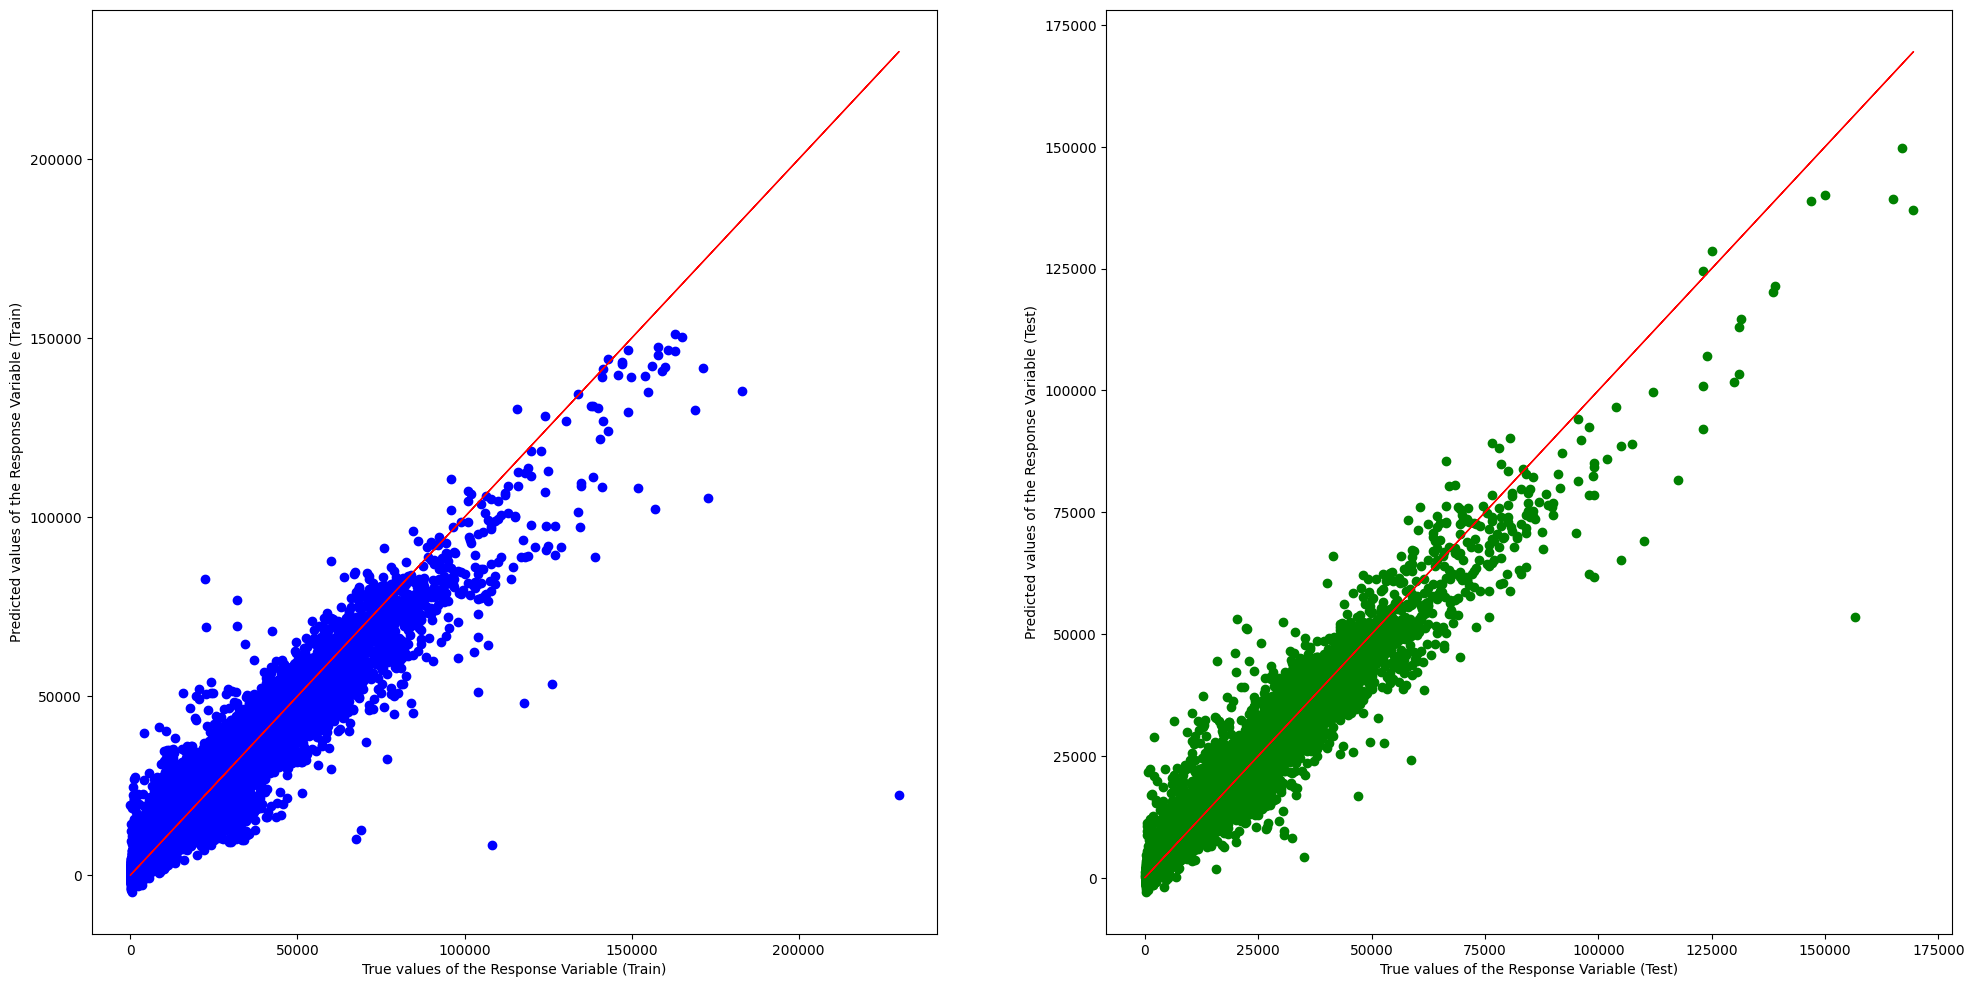

In [51]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()